# 앙상블

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [39]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size=0.3, random_state=123)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [40]:
#모델 생성 - 기본 옵션으로 트리 생성
rf_uncustomized = RandomForestRegressor(random_state=123)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.933
Score on test set : 0.708


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
# 모델 Parameter 조정 : -n_estimators (트리 수 변경에 따른 모델 성능)
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# n_estimators : 트리 수 변경(1~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 123)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [55]:
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.933,0.708
1,20,0.940,0.742
2,30,0.948,0.741
3,40,0.950,0.742
4,50,0.951,0.742
5,60,0.952,0.737
6,70,0.953,0.740
7,80,0.953,0.744
8,90,0.952,0.744
9,100,0.953,0.746


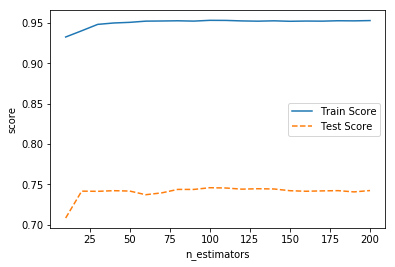

In [56]:
plt.plot(para_n_tree, train_score, linestyle='-', label="Train Score")
plt.plot(para_n_tree, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [63]:
train_score=[]
test_score=[]
# min_sample_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=123, n_estimators=100,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [64]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.953,0.746
1,2,0.937,0.745
2,3,0.910,0.735
3,4,0.884,0.728
4,5,0.857,0.724
5,6,0.828,0.718
6,7,0.806,0.715
7,8,0.787,0.712
8,9,0.770,0.709
9,10,0.756,0.704


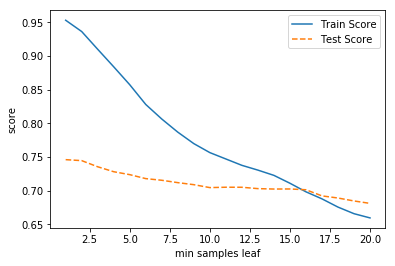

In [65]:
plt.plot(para_leaf, train_score, linestyle='-', label="Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [97]:
train_score =[]
test_score = []
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(random_state=123, n_estimators=100, min_samples_leaf=14,
                              min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [98]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.723,0.702
1,6,0.723,0.702
2,8,0.723,0.702
3,10,0.723,0.702
4,12,0.723,0.702
5,14,0.723,0.702
6,16,0.723,0.702
7,18,0.723,0.702
8,20,0.723,0.702
9,22,0.723,0.702


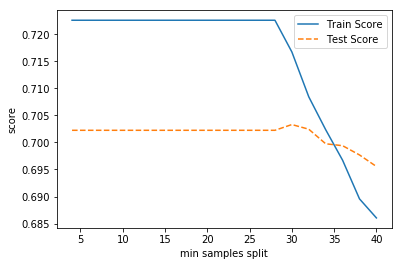

In [99]:
plt.plot(para_split, train_score, linestyle='-', label="Train Score")
plt.plot(para_split, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [80]:
# max_depth 조정6	0.601	0.451
16	17	0.587	0.447
17	18	0.571	0.444
18	19	0.568	0.450
19	20	0.558	0.451
train_score = []
test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range (1, 11)]

for v_max_depth in para_depth :
    rf = RandomForestRegressor(random_state = 123, n_estimators = 100, min_samples_leaf = 14,
                              min_samples_split=34, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [81]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.545,0.537
1,2,0.668,0.677
2,3,0.698,0.697
3,4,0.702,0.700
4,5,0.702,0.700
5,6,0.702,0.700
6,7,0.702,0.700
7,8,0.702,0.700
8,9,0.702,0.700
9,10,0.702,0.700


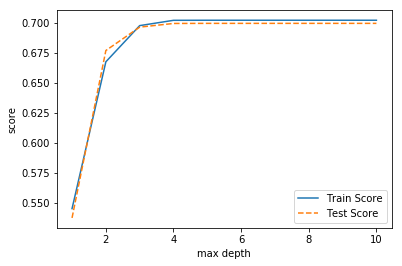

In [82]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

In [92]:
rf_final = RandomForestRegressor(random_state=123, n_estimators=100, min_samples_leaf=14,
                                min_samples_split=34, max_depth=5)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

rf_final

Score on training set : 0.702
Score on test set : 0.700


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=34,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

### 결론 도출

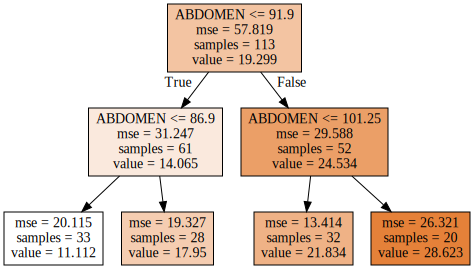

In [93]:
# 최종 모델 시각화
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

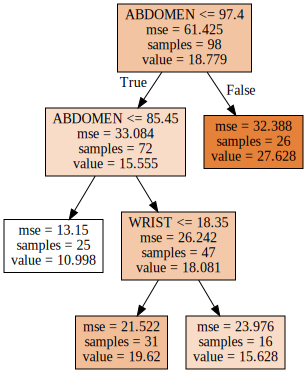

In [94]:
# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_0.dot 그리기
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

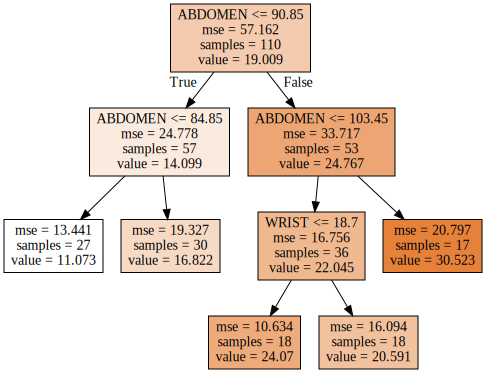

In [95]:
# 10번 트리
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_0.dot 그리기
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [91]:
# 설명변수의 중요도
# tree.feature_importance_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance 의 테이블을 중요도 순으로 결정
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.942
4,CHEST,0.015
12,WRIST,0.010
2,HEIGHT,0.010
3,NECK,0.008
1,WEIGHT,0.005
0,AGE,0.005
9,ANKLE,0.002
11,FOREARM,0.001
6,HIP,0.001


Text(0, 0.5, '변수')

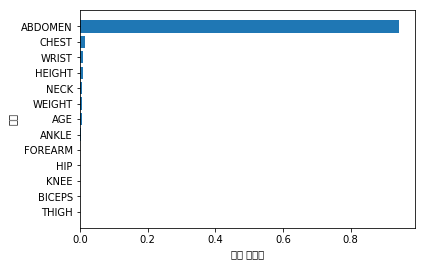

In [96]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### GridSearchCV 를 이용한 최적 Parameter 찾기

In [103]:
estimator = RandomForestRegressor(random_state=123)
# 구하고자 하는 parameter와 범위
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

best estimator model : 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

best parameter : 
{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4}

best score : 
0.599


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 실습

In [189]:
df_diabetes = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv', engine='python')
df_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [190]:
import numpy as np

for i in range(1, 11, 1) :
  num1, num2 = np.percentile(df_diabetes.iloc[:,[i]], [25, 75])

  iqr_max = num2 + 1.5 * (num2- num1)
  iqr_min = num1 - 1.5 * (num2- num1)

  for j in range(0, len(df_diabetes.iloc[:,[i]])) :
      if (df_diabetes.iloc[j,i] > iqr_max):
          df_diabetes.iloc[j,i] = iqr_max
      elif (df_diabetes.iloc[j,i] < iqr_min) :
          df_diabetes.iloc[j,i] = iqr_min

In [191]:
dfd_raw_y = df_diabetes['Y']
dfd_raw_x = df_diabetes.drop('Y', axis=1, inplace=False)

In [210]:
dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(dfd_raw_x, dfd_raw_y,
                                                               test_size=0.3, random_state=42)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("test data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [211]:
rf_uncustomized = RandomForestRegressor(random_state=42)
rf_uncustomized.fit(dfd_train_x, dfd_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(dfd_train_x, dfd_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.872
Score on test set : 0.410


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

dfd_raw_x_const = add_constant(dfd_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = dfd_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(dfd_raw_x_const.values, i) for i in range(dfd_raw_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.219
2,GENDER,1.280
4,BP,1.465
10,GLUCOSE,1.482
3,BMI,1.519
9,LTG,9.337
8,TCH,10.082
7,HDL,16.323
6,LDL,34.300
5,CHOLESTEROL,54.647


In [213]:
dfd_raw_x.drop('CHOLESTEROL', axis=1, inplace=True)

In [214]:
dfd_raw_x_const = add_constant(dfd_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = dfd_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(dfd_raw_x_const.values, i) for i in range(dfd_raw_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.219
2,GENDER,1.278
4,BP,1.462
9,GLUCOSE,1.482
3,BMI,1.512
8,LTG,2.187
5,LDL,3.004
6,HDL,4.048
7,TCH,8.320
0,const,230.298


In [215]:
dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(dfd_raw_x, dfd_raw_y,
                                                               test_size=0.3, random_state=42)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("test data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 9)
train data Y size : (309,)
test data X size : (133, 9)
test data Y size : (133,)


In [216]:
rf_uncustomized = RandomForestRegressor(random_state=42)
rf_uncustomized.fit(dfd_train_x, dfd_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(dfd_train_x, dfd_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.873
Score on test set : 0.410


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [217]:
train_score = []
test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 42)
    rf.fit(dfd_train_x, dfd_train_y)
    train_score.append(rf.score(dfd_train_x, dfd_train_y))
    test_score.append(rf.score(dfd_test_x, dfd_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [218]:
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.873,0.410
1,20,0.900,0.459
2,30,0.911,0.474
3,40,0.916,0.468
4,50,0.917,0.468
5,60,0.917,0.474
6,70,0.918,0.469
7,80,0.917,0.467
8,90,0.918,0.470
9,100,0.918,0.475


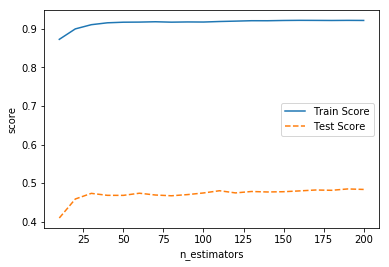

In [219]:
plt.plot(para_n_tree, train_score, linestyle='-', label="Train Score")
plt.plot(para_n_tree, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [220]:
train_score=[]
test_score=[]
# min_sample_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=42, n_estimators=110,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(dfd_train_x, dfd_train_y)
    train_score.append(rf.score(dfd_train_x, dfd_train_y))
    test_score.append(rf.score(dfd_test_x, dfd_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [221]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.480
1,2,0.886,0.486
2,3,0.834,0.499
3,4,0.789,0.496
4,5,0.750,0.502
5,6,0.721,0.509
6,7,0.694,0.505
7,8,0.671,0.505
8,9,0.651,0.508
9,10,0.639,0.511


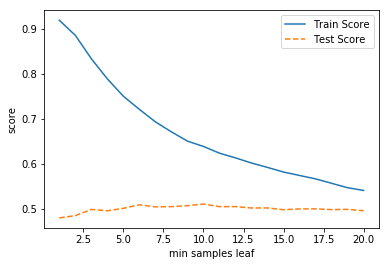

In [222]:
plt.plot(para_leaf, train_score, linestyle='-', label="Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [223]:
train_score =[]
test_score = []
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(8, 31)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(random_state=42, n_estimators=110, min_samples_leaf=10,
                              min_samples_split=v_min_samples_split)
    rf.fit(dfd_train_x, dfd_train_y)
    train_score.append(rf.score(dfd_train_x, dfd_train_y))
    test_score.append(rf.score(dfd_test_x, dfd_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [224]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,16,0.639,0.511
1,18,0.639,0.511
2,20,0.639,0.511
3,22,0.631,0.511
4,24,0.625,0.513
5,26,0.617,0.515
6,28,0.608,0.516
7,30,0.600,0.516
8,32,0.595,0.516
9,34,0.589,0.515


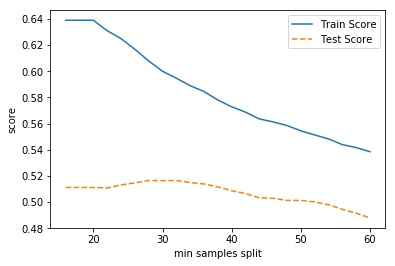

In [225]:
plt.plot(para_split, train_score, linestyle='-', label="Train Score")
plt.plot(para_split, test_score, linestyle='--', label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [226]:
train_score = []
test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range (1, 11)]

for v_max_depth in para_depth :
    rf = RandomForestRegressor(random_state = 42, n_estimators = 110, min_samples_leaf = 10,
                              min_samples_split=32, max_depth=v_max_depth)
    rf.fit(dfd_train_x, dfd_train_y)
    train_score.append(rf.score(dfd_train_x, dfd_train_y))
    test_score.append(rf.score(dfd_test_x, dfd_test_y))
    
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [227]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.360,0.323
1,2,0.499,0.457
2,3,0.553,0.503
3,4,0.581,0.513
4,5,0.591,0.515
5,6,0.594,0.516
6,7,0.595,0.516
7,8,0.595,0.516
8,9,0.595,0.516
9,10,0.595,0.516


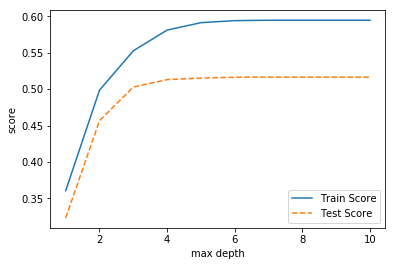

In [228]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

In [229]:
rf_final = RandomForestRegressor(random_state=42, n_estimators=110, min_samples_leaf=10,
                                min_samples_split=32, max_depth=5)
rf_final.fit(dfd_train_x, dfd_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(dfd_train_x, dfd_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(dfd_test_x, dfd_test_y)))

rf_final

Score on training set : 0.591
Score on test set : 0.515


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)